In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv')

In [5]:
df_copy = df.copy()

### Start Data Cleaning 

In [8]:
df_copy.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [10]:
df_copy[df_copy.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [12]:
# Drop the 122 row as all the fields are Null and Reset the index

df_copy = df_copy.drop(index=122).reset_index(drop=True)

In [14]:
df_copy[df_copy.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [16]:
# Create a new column for Bejaia and Sidi-Bel. Regions from 0 to 121 belong to Bejaia and from 122 onwards belong to Sidi-Bel

df_copy.loc[:122, 'Region'] = 0       # Assigned 0 to Bejaia 
df_copy.loc[122:,'Region'] = 1       # Assigned 1 to Sidi-Bel

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [20]:
df_copy[['Region']] = df_copy[['Region']].astype(int)

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [24]:
df_copy.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [26]:
# Removing the remaining Null Values and Resetting the index

df_copy = df_copy.dropna().reset_index(drop=True)

In [28]:
df_copy.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [30]:
df_copy.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [32]:
# We should also drop  the index 122 and do reset  index as this row is irrelevant

df_copy = df_copy.drop(index=122).reset_index(drop=True)

In [34]:
df_copy.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [36]:
df_copy.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [38]:
# We can see there is a space at the end of Classes column name. We should remove that as well.

df_copy.columns = df_copy.columns.str.strip()

In [40]:
df_copy.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [42]:
# Change the required columns as integer datatype

df_copy[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df_copy[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [44]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [46]:
# Change the required columns as float datatype

features = [columns for columns in df_copy.columns if df_copy[columns].dtypes == 'O']
for i in features:
    if i != 'Classes':
        df_copy[i] = df_copy[i].astype(float)

In [48]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [50]:
# Let's save the cleaned Dataset

df_copy.to_csv('Cleaned_Algerian_forest_fires_dataset.csv', index=False)

## EDA and Feature Engineering

In [53]:
df1 = df_copy.drop(columns=['day', 'month', 'year'], axis=1)

In [55]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [57]:
# Encoding of the categories in Classes

df1['Classes'] = np.where(df1['Classes'].str.contains('not fire'), 0, 1)
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [59]:
df1['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

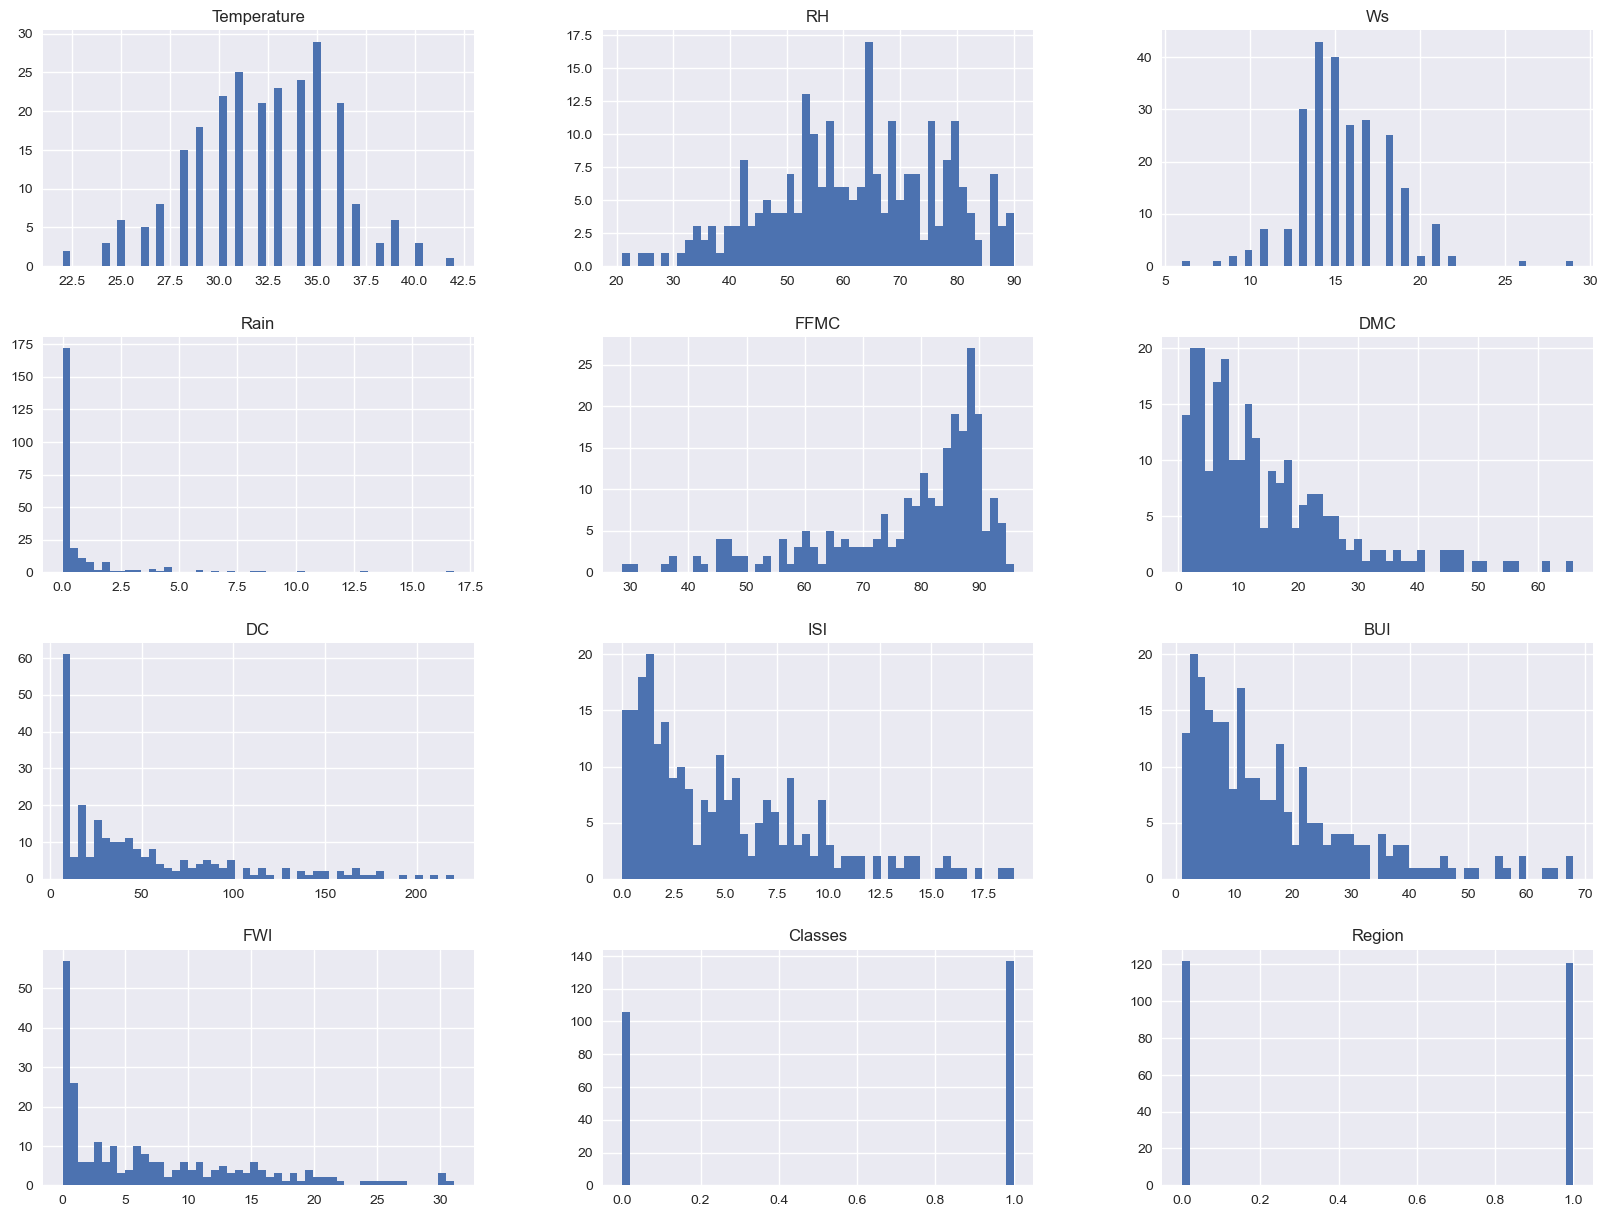

In [61]:
# Plot Density plot for all features

plt.style.use('seaborn-v0_8')
df1.hist(bins=50, figsize=(20, 15))
plt.show()

In [62]:
# Check percentage of Fire and Not Fire

percentage = df1['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

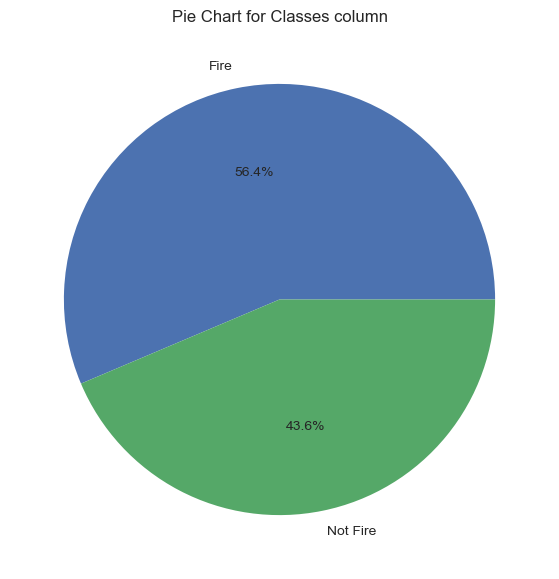

In [63]:
# Plotting Pie Chart for Fire and Not Fire

Classlabels = ['Fire', 'Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage, labels=Classlabels, autopct='%1.1f%%')
plt.title('Pie Chart for Classes column')
plt.show()

In [67]:
# Check the correlation for all the features

df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


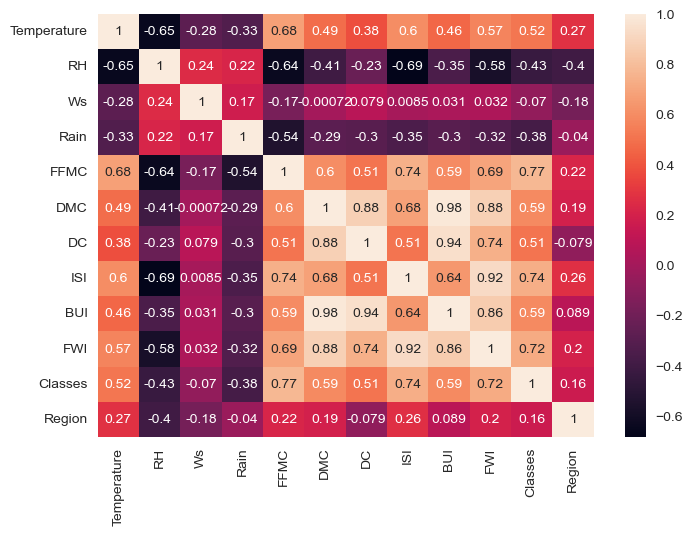

In [69]:
sns.heatmap(df1.corr(), annot=True)
plt.show()

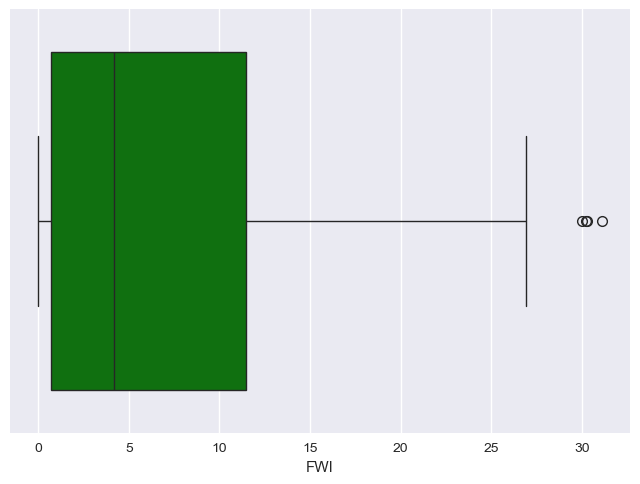

In [71]:
# Box Plot

sns.boxplot(df_copy['FWI'], color='g', orient='h')
plt.show()

In [73]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 'not fire', 'fire')

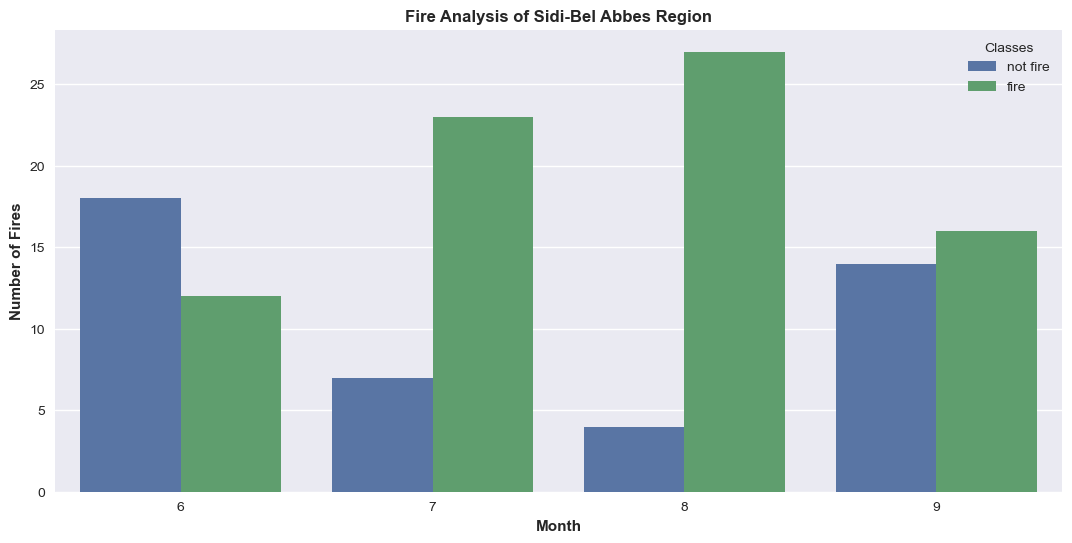

In [75]:
# Monthly Fire Analysis

dftemp = df_copy.loc[df_copy['Region']==1]
plt.subplots(figsize=(13, 6))
sns.countplot(x='month', hue='Classes', data=dftemp)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Month', weight='bold')
plt.title('Fire Analysis of Sidi-Bel Abbes Region', weight='bold')
plt.show()

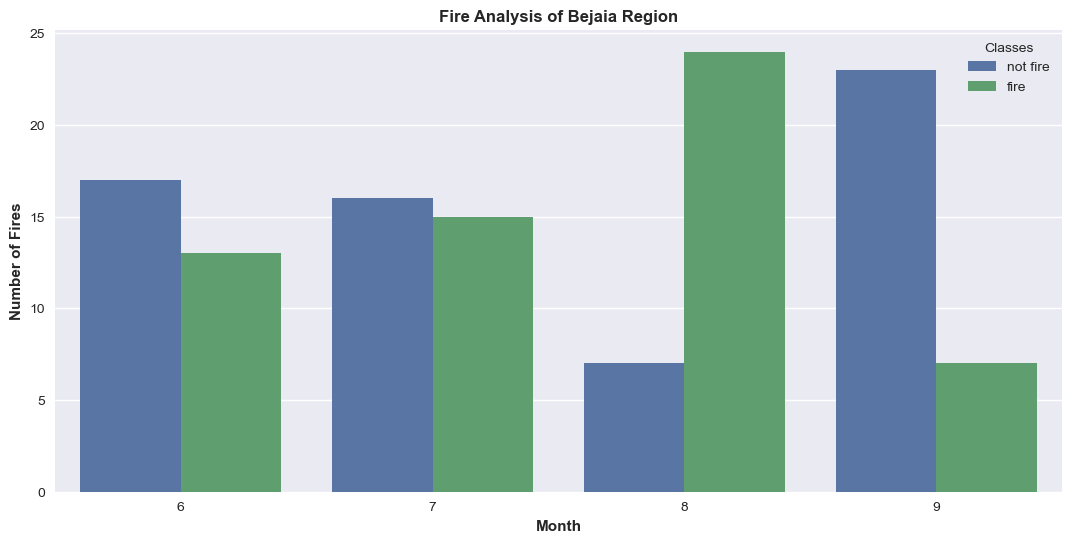

In [77]:
dftemp = df_copy.loc[df_copy['Region']==0]
plt.subplots(figsize=(13, 6))
sns.countplot(x='month', hue='Classes', data=dftemp)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Month', weight='bold')
plt.title('Fire Analysis of Bejaia Region', weight='bold')
plt.show()

### Conclusions:
1. It was observed that August and September had the most number of Forest Fires for both regions.
2. Most of the fires occured in August and very high fires occured in only three months: June, July and August.
3. Less Fires were on September 

## Feature Selection

In [81]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [83]:
df1.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [85]:
df1['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [87]:
# Divide Features into Dependent and Independent Features

X = df1.drop(columns='FWI', axis=1)
y = df1['FWI']

In [89]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
# Feature Selection based on correlation

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


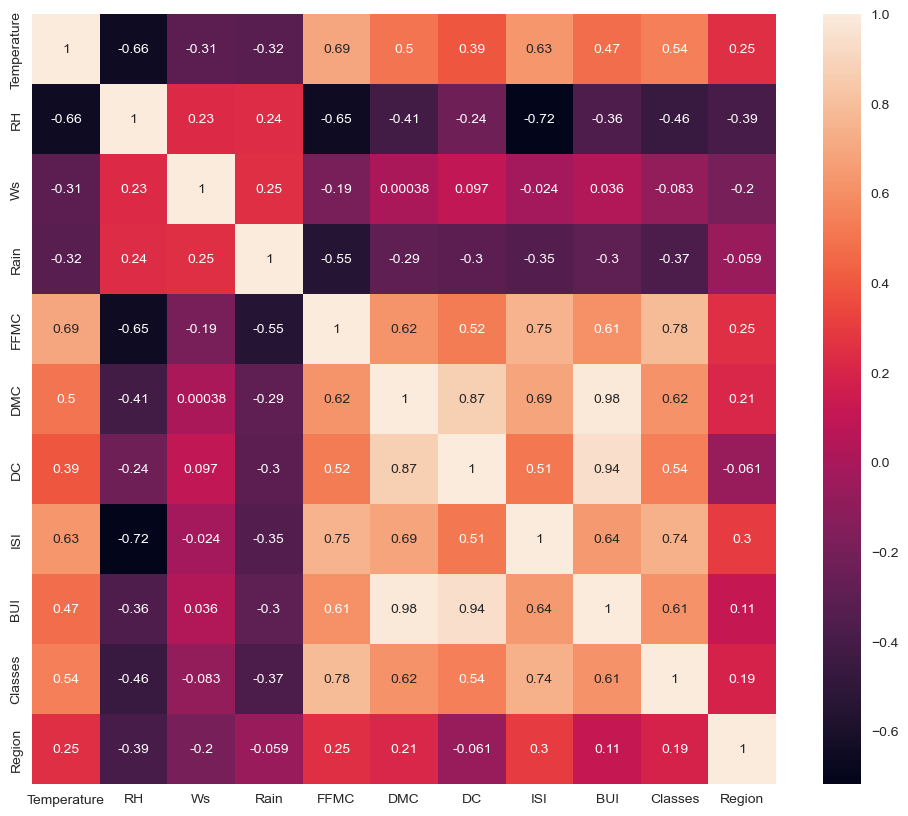

In [93]:
# Check for Multicollinearity

plt.figure(figsize=(12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [95]:
# We create a function which will determine which features are correlated with respect to the threshould.

def correlation(dataset, threshould):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshould:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [97]:
# The threshould is set by the domain expertise. 

corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [99]:
# We will drop the above two features/columns

X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [101]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')

## Feature Scaling or Standardization

In [104]:
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

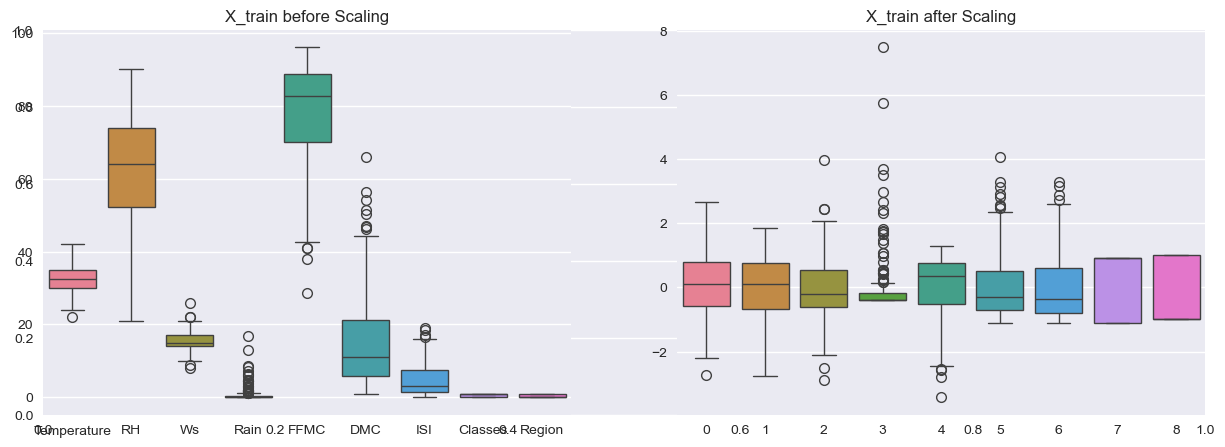

In [106]:
# Create Boxplots to understand the effect of Standardization

plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after Scaling')
plt.show()

## Model Training

### Apply Linear Regression Model

In [110]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {score}")

Mean Absolute Error: 0.5468236465249993
R2 Score: 0.9847657384266951


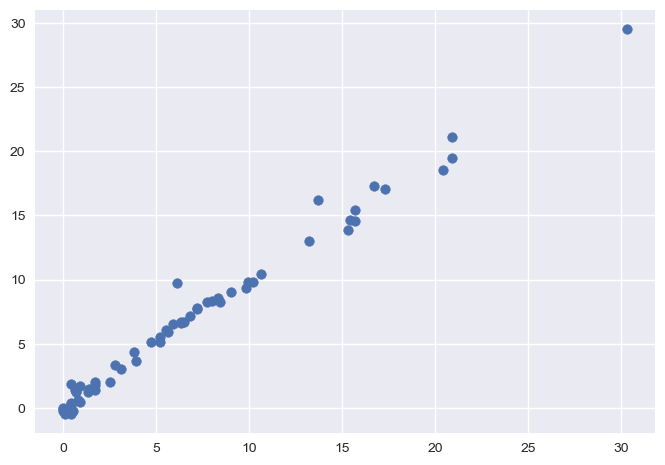

In [112]:
plt.scatter(y_test, y_pred)
plt.show()

### Apply Ridge Regression Model

Mean Absolute Error: 0.5642305340105712
R2 Score: 0.9842993364555513


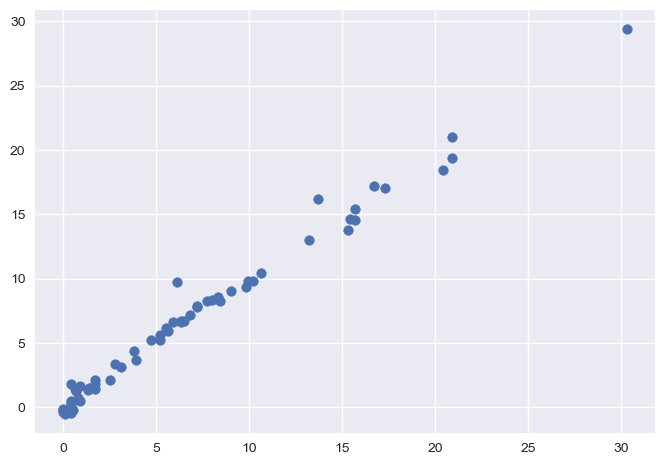

In [115]:
ridge_reg = Ridge()
ridge_reg.fit(X_train_scaled, y_train)
y_pred = ridge_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {score}")
plt.scatter(y_test, y_pred)
plt.show()

### Cross Validation Ridge

Mean Absolute Error: 0.5642305340105712
R2 Score: 0.9842993364555513


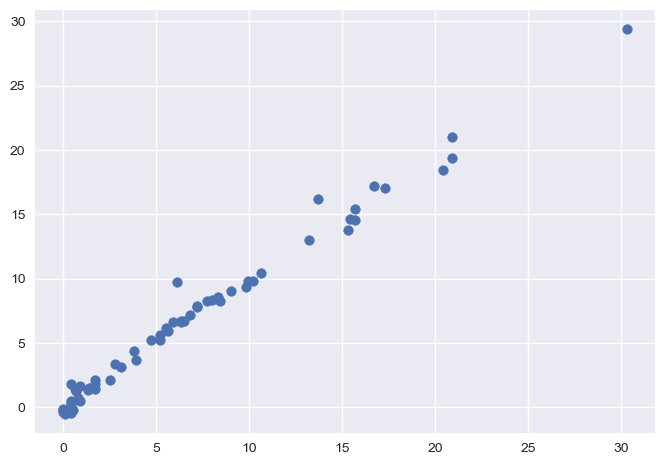

In [118]:
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {score}")
plt.scatter(y_test, y_pred)
plt.show()

In [120]:
ridgecv.coef_

array([-0.02692577, -0.20519212,  0.02554428, -0.04069202, -0.78583006,
        3.68286744,  4.74488835,  0.43423672, -0.38466214])

### Apply Lasso Regression Model

Mean Absolute Error: 1.1331759949144085
R2 Score: 0.9492020263112388


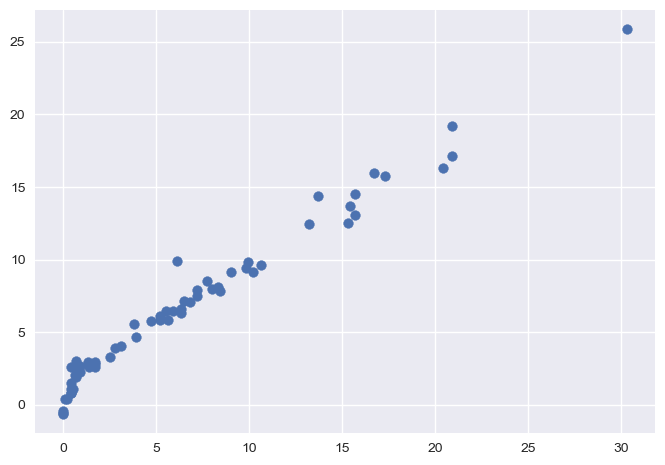

In [124]:
# Apply Lasso Regression Model

lasso_reg = Lasso()
lasso_reg.fit(X_train_scaled, y_train)
y_pred = lasso_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {score}")
plt.scatter(y_test, y_pred)
plt.show()

### Cross Validation Lasso

In [127]:
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [129]:
lassocv.coef_

array([-0.        , -0.        ,  0.        ,  0.        , -0.40063928,
        3.60177292,  4.7999393 ,  0.16408964, -0.3022766 ])

In [131]:
lassocv.alpha_

0.05725391318234408

In [133]:
y_pred = lassocv.predict(X_test_scaled)

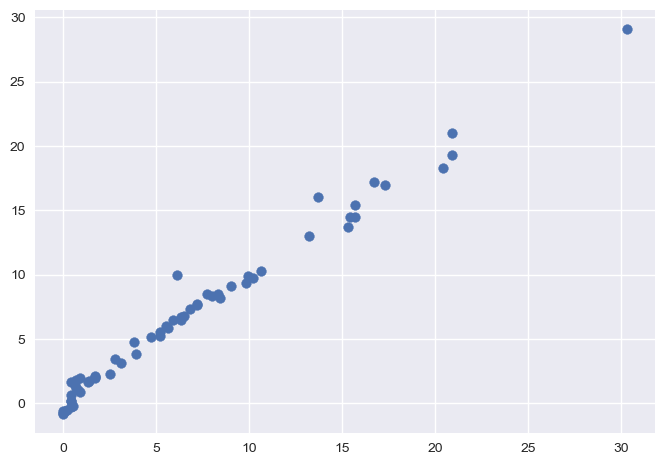

In [135]:
plt.scatter(y_test, y_pred)
plt.show()

In [137]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {score}")

Mean Absolute Error: 0.6199701158263432
R2 Score: 0.9820946715928275


### Apply Elastic-Net Regression Model

Mean Absolute Error: 1.8822353634896
R2 Score: 0.8753460589519703


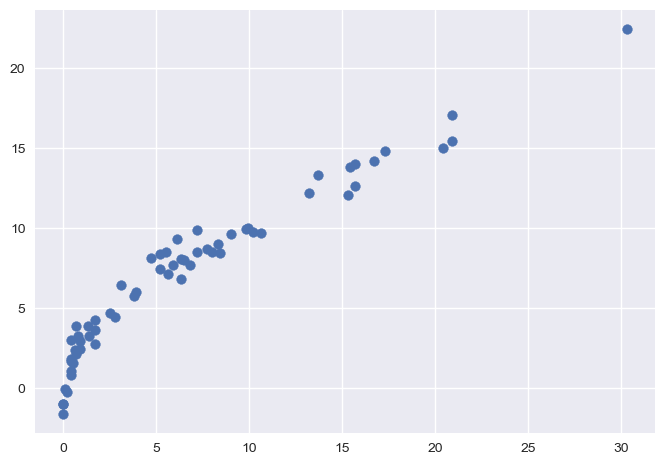

In [141]:
elastic_reg = ElasticNet()
elastic_reg.fit(X_train_scaled, y_train)
y_pred = elastic_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {score}")
plt.scatter(y_test, y_pred)
plt.show()

### Cross Validation Elastic-Net

Mean Absolute Error: 0.6575946731430905
R2 Score: 0.9814217587854941


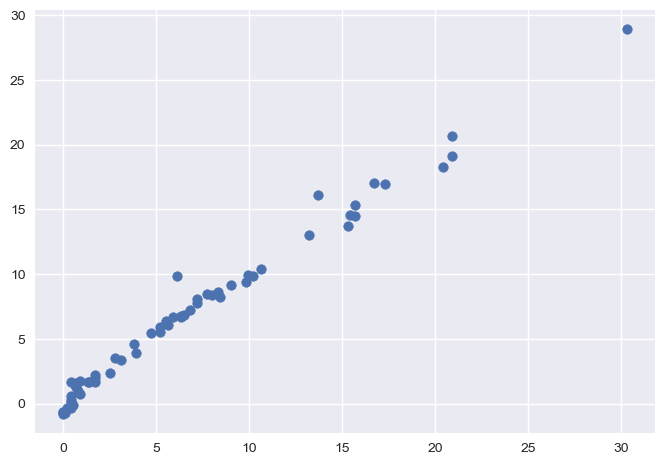

In [144]:
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled, y_train)
y_pred = elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {score}")
plt.scatter(y_test, y_pred)
plt.show()

In [146]:
elasticcv.coef_

array([-0.        , -0.19081149,  0.05486916, -0.        , -0.50794865,
        3.59828374,  4.50431349,  0.41864659, -0.32815292])

In [148]:
elasticcv.alpha_

0.04311146156383891

In [150]:
elasticcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [154]:
pickle.dump(Scaler, open('Scaler.pkl', 'wb'))
pickle.dump(elasticcv, open('Elasticnet.pkl', 'wb'))